In [ ]:
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 4.8 MB/s 
     |████████████████████████████████| 6.6 MB 40.5 MB/s 
     |████████████████████████████████| 120 kB 65.3 MB/s 


In [ ]:
!pip install nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 298 kB 4.6 MB/s 
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=e24eb1b4a75f44d23a7874043b7cb9a82c7e86d248a1c952aff4a57245ea0b49
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built littleutils
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: pytest
    Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from transformers import AutoTokenizer, AutoModel
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup
import torch
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from distutils.version import LooseVersion as LV
from sklearn.metrics import f1_score

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir("/content/drive/MyDrive/TextAnalytics - AMI 2020/dataset")

In [ ]:
## TRAINING SET
ami_csv = "training_set_cleaned.csv"
df = pd.read_csv(ami_csv)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,
                                                  df['target'],
                                                  stratify=df['target'],
                                                  test_size=0.2,
                                                  random_state=42
)

In [ ]:
train_labels_mlc = torch.tensor(y_train.tolist())
test_labels_mlc = torch.tensor(y_test.tolist())
print(train_labels_mlc)
print(test_labels_mlc)

tensor([0, 0, 0,  ..., 2, 0, 0])
tensor([2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0,
        2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2,
        1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0,
        2, 0, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1,
        1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0,
        2, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0,
        2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0,
        2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2,
        0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2,
        0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
        0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2,
       

#ALBERTo

In [ ]:
!pip install tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Load BERT tokenizer

BERT_MODEL = 'm-polignano-uniba/bert_uncased_L-12_H-768_A-12_italian_alb3rt0'

tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL,
                                          do_lower_case=True)

In [ ]:
df.head()

,text,misogynous,aggressiveness,target,final_text_wo_tag,final_text_tag
0,<mention_1> <mention_2> fatti trovare te lo d...,1,1,2,fare trovare do volentieri sborrare bocca,<mention> fare trovare do volentieri sborrare ...
1,<mention_1> tu dovresti ricominciare dai semaf...,1,1,2,dovresti ricominciare semafori fare lavavetri ...,<mention> dovresti ricominciare semafori fare ...
2,"amore,sei presentabile? xchè così via skype ti...",1,1,2,amore presentabile perchè skype fare conoscere...,amore presentabile perchè skype fare conoscere...
3,<mention_1> salvo poi mandare la culona a mosc...,1,0,1,mandare culona mosca aummaumm fare si dare put...,<mention> mandare culona mosca aummaumm fare s...
4,"<mention_1> <mention_2> vediamo gentiloni, è o...",1,1,2,vedere gentiloni finire lo servili pensare dan...,<mention> vedere gentiloni finire lo servili p...


In [ ]:
def encode_tweets(dataset, text):
  encoded_tweets = tokenizer.batch_encode_plus(
      dataset[text].tolist(), # encode a batch of sequence
      add_special_tokens=True, # special tokens: [CLS] and [SEP] 
      truncation = True,
      max_length= 35,
      padding = True,
      return_attention_mask=True,   
      return_tensors ='pt'
  )
  return encoded_tweets

In [ ]:
# encode train and test set 
encoded_train = encode_tweets(X_train,'final_text_tag')
encoded_test =   encode_tweets(X_test,'final_text_tag')

In [ ]:
# get input ids and attention masks from trainin and val set
encoded_train_ids = encoded_train['input_ids']
attention_masks_train = encoded_train['attention_mask']

encoded_test_ids = encoded_test['input_ids']
attention_masks_test = encoded_test['attention_mask']

In [ ]:
(encoded_train_ids, encoded_val_ids,
 train_labels_mlc, val_labels_mlc) = train_test_split(encoded_train_ids, train_labels_mlc,
                                                     random_state=43,
                                                     test_size=0.1)

In [ ]:
(attention_masks_train, attention_masks_val,
 _, _) = train_test_split(attention_masks_train, encoded_train['input_ids'],
                          random_state=43, 
                          test_size=0.1)

In [ ]:
print('Input Ids :', encoded_train_ids[13])
print('Attention Mask:', attention_masks_train[13])

print('')

print('Input Ids Class :', type(encoded_train_ids))
print('Attention Mask Class:', type(attention_masks_train))

print('')

print('Input Ids shape :', encoded_train_ids[13].shape)
print('Attention Mask shape:', attention_masks_train[13].shape)

Input Ids : tensor([     2,      6,  20194, 127748,   8014,    402,   9599,  20917,   5846,
         29145,    279,    189,    574,     22,   1518,   2252,  11140,  35022,
             3,      0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0])
Attention Mask: tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Input Ids Class : <class 'torch.Tensor'>
Attention Mask Class: <class 'torch.Tensor'>

Input Ids shape : torch.Size([35])
Attention Mask shape: torch.Size([35])


In [ ]:
BATCH_SIZE = 16

In [ ]:
def get_dataloader(encoded_input,attention_masks,labels,smplr):
  data = TensorDataset(encoded_input, attention_masks,
                            labels)

  data_sampler = smplr(data)
  dataloader = DataLoader(data, sampler=data_sampler,
                                batch_size=BATCH_SIZE)

  return dataloader

In [ ]:
# create PyTorch DataLoaders for train and val set.
train_dataloader = get_dataloader(encoded_train_ids, attention_masks_train,
                            train_labels_mlc, RandomSampler) # batches are selected randomly

val_dataloader = get_dataloader(encoded_val_ids, attention_masks_val,
                                val_labels_mlc,SequentialSampler) # batches are selected sequentially

test_dataloader = get_dataloader(encoded_test_ids, attention_masks_test,
                                test_labels_mlc,SequentialSampler) # batches are selected sequentially

#### BertForSequenceClassification with m-polignano-uniba/bert_uncased_L-12_H-768_A-12_italian_alb3rt0

In [ ]:
# calculate f1 score 
def f1score(preds, labels):
    preds_flat=np.argmax(preds, axis=1).flatten()
    labels_flat=labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
# load pretrained BERT model with a single linear classification layer on top

model = BertForSequenceClassification.from_pretrained(BERT_MODEL, num_labels=3)

print('Pretrained BERT model "{}" loaded'.format(BERT_MODEL))

Some weights of the model checkpoint at m-polignano-uniba/bert_uncased_L-12_H-768_A-12_italian_alb3rt0 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were

Pretrained BERT model "m-polignano-uniba/bert_uncased_L-12_H-768_A-12_italian_alb3rt0" loaded


In [ ]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
if torch.cuda.is_available():
    print('GPU available')
    device = torch.device('cuda')
    devicename = '['+torch.cuda.get_device_name(0)+']'
else:
    print('GPU not available')
    device = torch.device('cpu')
    devicename = ""
    
print('Using PyTorch version:', torch.__version__,
      'Device:', device, devicename)
assert(LV(torch.__version__) >= LV("1.0.0"))

GPU available
Using PyTorch version: 1.12.1+cu113 Device: cuda [Tesla T4]


In [ ]:
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(128000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
# Define Adam Optimizer 
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr = 1e-5, 
    eps=1e-8
)

In [ ]:
EPOCHS = 3 

WARMUP_STEPS =int(0.2*len(train_dataloader))
print("WARMUP_STEPS: ", WARMUP_STEPS)

TRAIN_STEPS = len(train_dataloader)* EPOCHS
print("TRAIN_STEPS: ", TRAIN_STEPS)

WARMUP_STEPS:  39
TRAIN_STEPS:  594


In [ ]:
# Define Scheduler 
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=WARMUP_STEPS,
                                 num_training_steps =len(train_dataloader)*EPOCHS)

In [ ]:
def train(epoch, loss_vector=None,log_interval=200):
  # Set model to training mode
  model.train()

  total_train_loss = 0

  for step, batch in enumerate(train_dataloader):

    batch = tuple(t.to(device) for t in batch)

    b_input_ids = batch[0]
    b_input_mask = batch[1] 
    b_labels = batch[2]

    # Set the gradients to zero
    optimizer.zero_grad()

    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None,
                    attention_mask=b_input_mask, labels=b_labels)

    loss = outputs.loss
    if loss_vector is not None:
      loss_vector.append(loss.item())
    total_train_loss += loss.item()    

    # Backward pass
    loss.backward()

    # mitigate the problem of exploding gradients 
    # (large error gradients accumulate and result in 
    # very large updates to neural network model weights during training)
    torch.nn.utils.clip_grad_norm_(model.parameters(),
                                      1.0)

    # Update weights
    optimizer.step()
    scheduler.step()

    if step % log_interval == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, step * len(b_input_ids),
                len(train_dataloader.dataset),
                100. * step / len(train_dataloader), loss))
        
  # average loss all of the batches
  avg_train_loss = total_train_loss / len(train_dataloader)    

  print("Average training loss: {0:.3f}".format(avg_train_loss))
  print()

In [ ]:
def evaluate(loader, loss_vector=None):
  model.eval()

  total_val_f1 = 0
  total_val_loss = 0
  n_correct, n_all = 0, 0

  for i, batch in enumerate(loader):
      batch = tuple(t.to(device) for t in batch)
      b_input_ids = batch[0]
      b_input_mask = batch[1]
      b_labels = batch[2]
      
      with torch.no_grad():        
          model2 = model(b_input_ids, 
                                  token_type_ids=None, 
                                  attention_mask=b_input_mask,
                                  labels=b_labels)
          loss = model2.loss
          logits = model2.logits
          if loss_vector is not None:
            loss_vector.append(loss.item())

      total_val_loss += loss.item()

      logits = logits.detach().cpu().numpy()
      predictions = np.argmax(logits, axis=1)
      labels = b_labels.to('cpu').numpy()

      n_correct += np.sum(predictions == labels)
      n_all += len(labels)
      total_val_f1 += f1score(logits, labels)

  # the final f1 over all of the batches.
  avg_val_f1 = total_val_f1 / len(val_dataloader)
  print(" F1 Score: {0:.2f}".format(avg_val_f1))

  # average loss over all of the batches.
  avg_val_loss = total_val_loss / len(val_dataloader)
  print("  Validation Loss: {0:.2f}".format(avg_val_loss))

  # average accuracy over all of the batches.
  print(' Accuracy: [{}/{}] {:.3f}'.format(n_correct, n_all,
                                        n_correct/n_all))
  print()

In [ ]:
train_loss = []
for epoch in range(1, EPOCHS + 1):
    train(epoch, train_loss)
    print('\nValidation set:')
    evaluate(val_dataloader)

Train Epoch: 1 [0/3164 (0%)]	Loss: 0.000125
Average training loss: 0.022


Validation set:
 F1 Score: 0.83
  Validation Loss: 1.27
 Accuracy: [293/352] 0.832

Train Epoch: 2 [0/3164 (0%)]	Loss: 0.000467
Average training loss: 0.019


Validation set:
 F1 Score: 0.82
  Validation Loss: 1.29
 Accuracy: [292/352] 0.830

Train Epoch: 3 [0/3164 (0%)]	Loss: 0.059959
Average training loss: 0.017


Validation set:
 F1 Score: 0.82
  Validation Loss: 1.29
 Accuracy: [292/352] 0.830



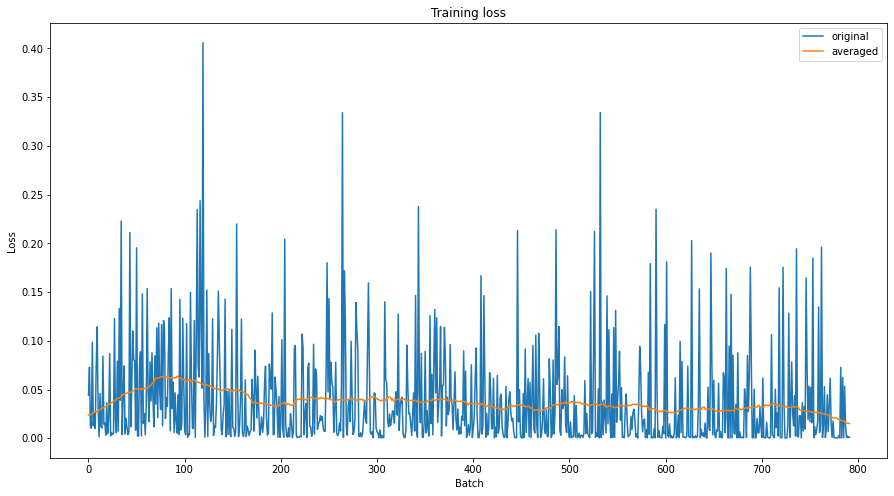

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss, label='original')
plt.plot(np.convolve(train_loss, np.ones(101), 'same') / 101,
         label='averaged')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def evaluate_test(loader, loss_vector=None):
  model.eval()

  predicted_labels = list()
  true_labels = list()

  for i, batch in enumerate(loader):
      batch = tuple(t.to(device) for t in batch)
      b_input_ids = batch[0]
      b_input_mask = batch[1]
      b_labels = batch[2]
      
      with torch.no_grad():        
          model2 = model(b_input_ids, 
                                  token_type_ids=None, 
                                  attention_mask=b_input_mask,
                                  labels=b_labels)
          logits = model2.logits

      logits = logits.detach().cpu().numpy()
      predictions = np.argmax(logits, axis=1)
      labels = b_labels.to('cpu').numpy()

      true_labels.extend(labels)
      predicted_labels.extend(predictions)
    
  print('Classification report:')
  print(classification_report(true_labels, predicted_labels))
  print('Confusion matrix:')
  cm = confusion_matrix(true_labels, predicted_labels)
  print(cm)

In [ ]:
evaluate_test(test_dataloader)

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       471
           1       0.44      0.39      0.41        95
           2       0.75      0.76      0.75       314

    accuracy                           0.80       880
   macro avg       0.69      0.69      0.69       880
weighted avg       0.79      0.80      0.80       880

Confusion matrix:
[[428   9  34]
 [ 11  37  47]
 [ 38  38 238]]


In [ ]:
## TEST SET
ami_test = "AMI2020_test_raw_gold_anon.tsv"
test = pd.read_csv(ami_test, sep = "\t")

In [ ]:
def target_label (row):
  if ((row["aggressiveness"] == 1) & (row["misogynous"] == 1)):
    return 2
  if ((row["aggressiveness"] == 0) & (row["misogynous"] == 1)):
    return 1
  else:
    return 0

test['target'] = test.apply(lambda row: target_label(row), axis=1)

In [ ]:
test.head()

,id,text,misogynous,aggressiveness,target
0,5001,Aveva voglia di gridare tutta la mia rabbia ma...,0,0,0
1,5002,Lei è acida perché non ha figli penso che dare...,0,0,0
2,5003,Ma quanto è brutto sentirsi dire dal proprio f...,0,0,0
3,5004,Per chi ci facciamo venire il groppo in gola s...,0,0,0
4,5005,<MENTION_1> Ti sborro io,1,0,1


In [ ]:
# encode test set
encoded_test = encode_tweets(test,'text')

# get input ids and attention masks from test set
encoded_test_ids = encoded_test['input_ids']
attention_masks_test = encoded_test['attention_mask']

test_labels = torch.tensor(test['target'].tolist())
print(test_labels)

tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0,
        2, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1,
        0, 0, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1,
        0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2,
        0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2,
        0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        1, 1, 1, 1, 2, 0, 2, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 2,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 2, 1,
        2, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
        2, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1,
        2, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1,

In [ ]:
# create PyTorch DataLoaders for test set
test_dataloader = get_dataloader(encoded_test_ids, attention_masks_test,
                            test_labels, SequentialSampler)

In [ ]:
def evaluate_test(loader):
  model.eval()

  n_correct, n_all = 0, 0
  total_test_f1score = 0

  for i, batch in enumerate(loader):
    batch = tuple(t.to(device) for t in batch)

    b_input_ids = batch[0]
    b_input_mask = batch[1] 
    b_labels = batch[2]

    # requires_grad flags to false
    with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None,
                      attention_mask=b_input_mask)
      
      logits = outputs.logits

    logits = logits.detach().cpu().numpy()
    predictions = np.argmax(logits, axis=1)

    labels = b_labels.to('cpu').numpy()
    n_correct += np.sum(predictions == labels)
    n_all += len(labels)
    total_test_f1score += f1score(logits, labels)
    print("batch", i, "-", "f1 score: {0:.3f}".format(f1score(logits, labels)))
    print()
  
  print('Accuracy: [{}/{}] {:.3f}'.format(n_correct, n_all,
                                          n_correct/n_all))
  print()
   # Calculate the average loss over all of the batches.
  avg_test_f1score = total_test_f1score / len(test_dataloader)
  print("Average f1 score: {0:.3f}".format(avg_test_f1score))
  print()

In [ ]:
print('Test set:')
evaluate_test(test_dataloader)

Test set:
batch 0 - f1 score: 0.679

batch 1 - f1 score: 0.621

batch 2 - f1 score: 0.570

batch 3 - f1 score: 0.619

batch 4 - f1 score: 0.559

batch 5 - f1 score: 0.484

batch 6 - f1 score: 0.616

batch 7 - f1 score: 0.514

batch 8 - f1 score: 0.517

batch 9 - f1 score: 0.528

batch 10 - f1 score: 0.413

batch 11 - f1 score: 0.460

batch 12 - f1 score: 0.650

batch 13 - f1 score: 0.386

batch 14 - f1 score: 0.403

batch 15 - f1 score: 0.462

batch 16 - f1 score: 0.415

batch 17 - f1 score: 0.580

batch 18 - f1 score: 0.579

batch 19 - f1 score: 0.607

batch 20 - f1 score: 0.712

batch 21 - f1 score: 0.522

batch 22 - f1 score: 0.529

batch 23 - f1 score: 0.696

batch 24 - f1 score: 0.607

batch 25 - f1 score: 0.580

batch 26 - f1 score: 0.521

batch 27 - f1 score: 0.480

batch 28 - f1 score: 0.585

batch 29 - f1 score: 0.590

batch 30 - f1 score: 0.405

batch 31 - f1 score: 0.438

Accuracy: [594/1000] 0.594

Average f1 score: 0.541

